In [18]:
pip install ydata-profiling --user

Note: you may need to restart the kernel to use updated packages.


# Part 3 Question 1

In [19]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport

# Load data into DataFrame
df = pd.read_csv('red_wine.csv',low_memory=False)


profile = ProfileReport(df, title="Profiling Report")


profile.to_notebook_iframe()




Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Part 3 Question 2

In [23]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Load the red-wine dataset
data = pd.read_csv("red_wine.csv")

# Separate features and target variable
X = data.drop("type", axis=1)
y = data["type"]

# Define models
models = {
    "Baseline": None,
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM-Linear": SVC(kernel="linear", probability=True),
    "SVM-RBF": SVC(kernel="rbf", probability=True),
    "Random Forest": RandomForestClassifier()
}

# Evaluate models using 10-fold cross-validation
results = []
for model_name, model in models.items():
    if model_name == "Baseline":
        # Baseline accuracy is the accuracy when predicting the majority class
        baseline_accuracy = y.value_counts(normalize=True).max()
        results.append([model_name, baseline_accuracy, 0.5])  # AUC for random classifier is 0.5
    else:
        # Perform cross-validation and calculate accuracy and AUC
        accuracy_scores = cross_val_score(model, X, y, cv=10, scoring="accuracy")
        auc_scores = cross_val_score(model, X, y, cv=10, scoring="roc_auc")
        results.append([model_name, accuracy_scores.mean(), auc_scores.mean()])

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "AUC"])

# Display the results DataFrame
results_df

,Model,Accuracy,AUC
0,Baseline,0.528897,0.500000
1,Logistic Regression,0.784785,0.879902
2,Naive Bayes,0.821627,0.895408
3,Decision Tree,0.758500,0.745112
4,SVM-Linear,0.791863,0.881489
5,SVM-RBF,0.535844,0.868920
6,Random Forest,0.791773,0.895550


# Part 3 Question 3

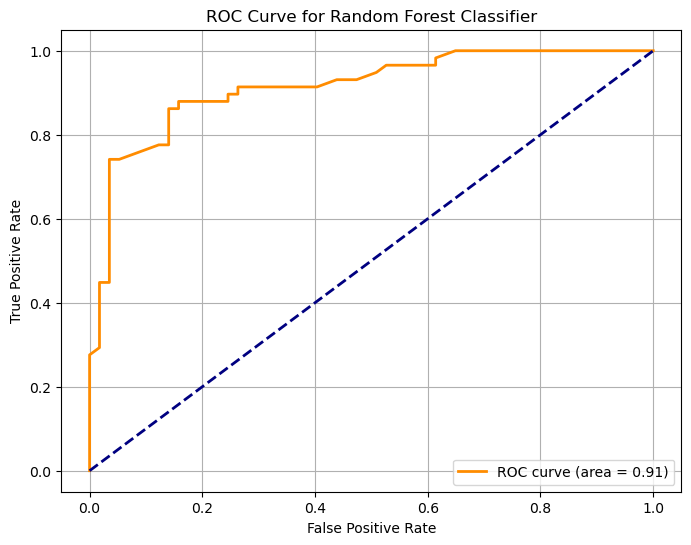

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Load the red-wine dataset
data = pd.read_csv("red_wine.csv")

# Separate features and target variable
X = data.drop("type", axis=1)
y = data["type"]

# Convert target variable to binary format
y_binary = y.apply(lambda x: 1 if x == 'high' else 0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Fit the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Get predicted probabilities for the positive class
y_scores = rf_classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


# Part 3 Question 4 and 5

In [24]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Load the red-wine dataset
data = pd.read_csv("white_wine.csv")

# Separate features and target variable
X = data.drop("type", axis=1)
y = data["type"]

# Define models
models = {
    "Baseline": None,
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM-Linear": SVC(kernel="linear", probability=True),
    "SVM-RBF": SVC(kernel="rbf", probability=True),
    "Random Forest": RandomForestClassifier()
}

# Evaluate models using 10-fold cross-validation
results = []
for model_name, model in models.items():
    if model_name == "Baseline":
        # Baseline accuracy is the accuracy when predicting the majority class
        baseline_accuracy = y.value_counts(normalize=True).max()
        results.append([model_name, baseline_accuracy, 0.5])  # AUC for random classifier is 0.5
    else:
        # Perform cross-validation and calculate accuracy and AUC
        accuracy_scores = cross_val_score(model, X, y, cv=10, scoring="accuracy")
        auc_scores = cross_val_score(model, X, y, cv=10, scoring="roc_auc")
        results.append([model_name, accuracy_scores.mean(), auc_scores.mean()])

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "AUC"])

# Display the results DataFrame
results_df

,Model,Accuracy,AUC
0,Baseline,0.782051,0.500000
1,Logistic Regression,0.858929,0.966667
2,Naive Bayes,0.932143,0.950000
3,Decision Tree,0.855357,0.758333
4,SVM-Linear,0.858929,0.966667
5,SVM-RBF,0.783929,0.913095
6,Random Forest,0.908929,0.958333
